# Computer Vision (Image operators and filters)

By the end of this lab, you will get hands on experience working with:

*   Image Handling
*   Image Manipulation
*   Histogram and Histogram Equalization
*   Basic filtering techniques

<!-- ### **Remember this is a graded exercise.** -->

**Reminder**:

*   For every plot, make sure you provide appropriate titles, axis labels, legends, wherever applicable.
*   Add sufficient comments and explanations wherever necessary.

---


In [7]:
# Loading necessary libraries (Feel free to add new libraries if you need for any computation)

import numpy as np
from matplotlib import pyplot as plt
from skimage import data, exposure, filters, io, morphology
from PIL import Image

# Channels and color spaces

### **Exercise: Image Creation and Color Manipulation**

*   Create a 100 x 100 image for each of the below visualization

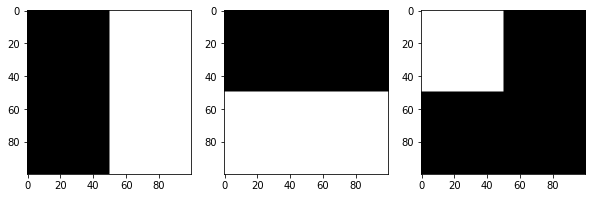

*   Visualize the created images in a 1 x 3 subplot using matplotlib.


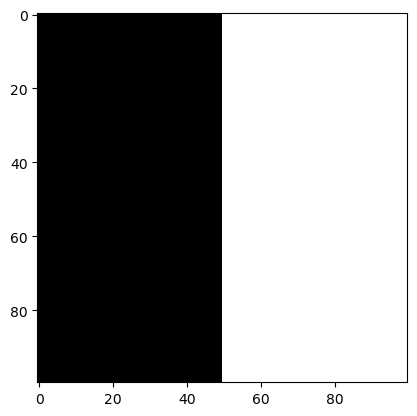

In [92]:
#vertical split
vertical_split = np.zeros((100, 100), dtype=np.uint8)
vertical_split[:, 50:] = 255
vertical_split_image = Image.fromarray(vertical_split)

#visualize using matplotlib
plt.imshow(vertical_split, cmap="gray", interpolation = "nearest")
plt.axis("on")
plt.show()

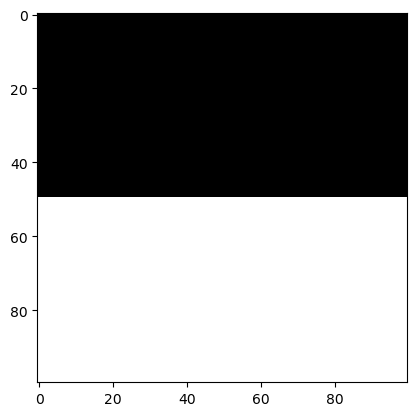

In [76]:
#Horizontal split
horizontal_split = np.zeros((100, 100), dtype=np.uint8)
horizontal_split[50:, :] = 255
horizontal_split_image = Image.fromarray(horizontal_split)

#visualize using matplotlib
plt.imshow(horizontal_split, cmap="gray", interpolation = "nearest")
plt.axis("on")
plt.show()

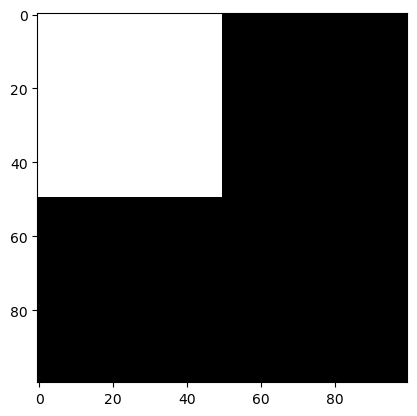

In [96]:
#three_quater_split
three_quater_split = np.zeros((100, 100), dtype=np.uint8)
three_quater_split[:50, :50] = 255
three_quater_split_image = Image.fromarray(three_quater_split)
three_quater_split_image.show()

#visualize using matplotlib
plt.imshow(three_quater_split, cmap="gray", interpolation = "nearest")
plt.axis("on")
plt.show()

*   Use the above three images to create the following image

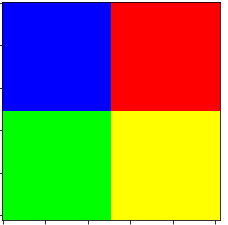
*Hint: Remember channels and color spaces*

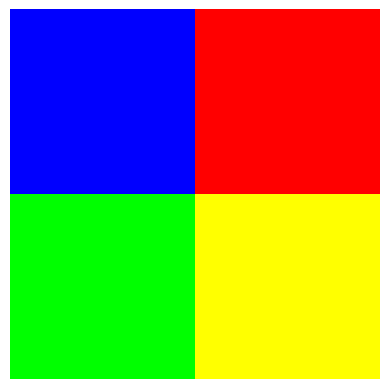

In [126]:
#four_colors
#first create a 3D 100 x 100 numpy array with each pixel represented by 3 values of Red, green and blue - RGB)
four_colors = np.zeros((100, 100, 3), dtype= np.uint8)
#Blue
four_colors[:50, :50]=[0, 0, 255]
#Red
four_colors[:50, 50:]=[255, 0, 0]
#Green
four_colors[50:, :50]=[0, 255, 0]
#Yellow
four_colors[50:, 50:]=[255, 255, 0]

#visualize
plt.imshow(four_colors)
plt.axis("off")
plt.show()

### **Exercise: Color Manipulation**

*   Read the image 'sillas.jpg' from the images folder

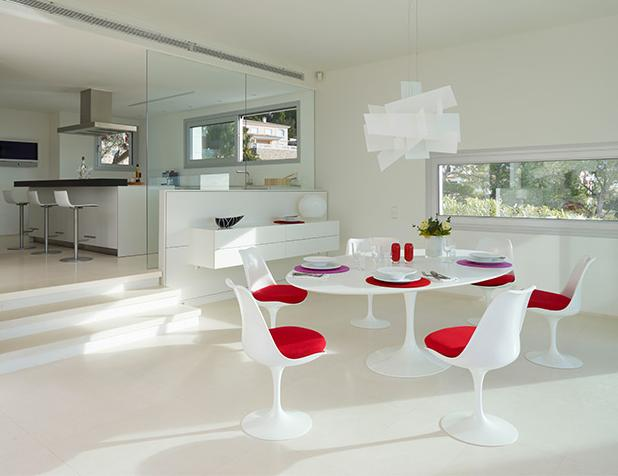

*   Extract individual channels and plot them using matplotlib subplot.



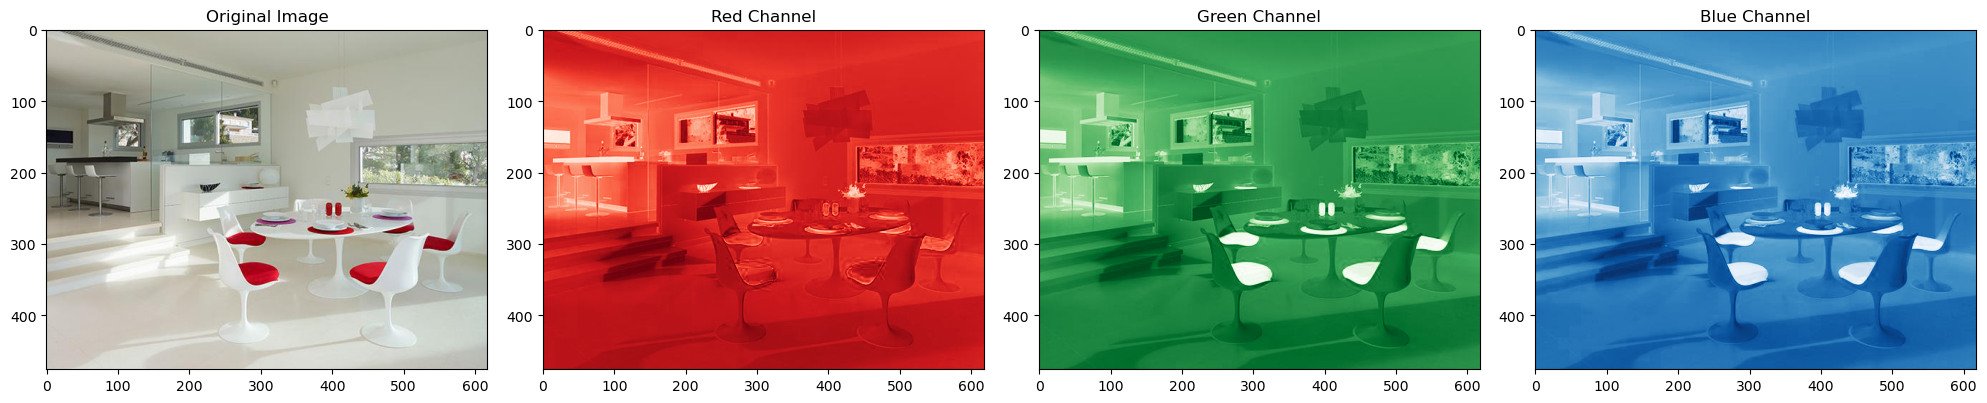

In [146]:
#load the image
image = Image.open("sillas.jpg")
#convert the image to RGB
image_rgb = image.convert("RGB")
#split the image into R,G,B channel
r,g,b = image_rgb.split()
#plot the original image and the individual channels
fig, axes = plt.subplots(1, 4, figsize=(20, 5))
#Original image show
axes[0].imshow(image_rgb)
axes[0].set_title("Original Image")
#Red channel
axes[1].imshow(np.array(r), cmap="Reds")
axes[1].set_title("Red Channel")
#Green channel
axes[2].imshow(np.array(g), cmap="Greens")
axes[2].set_title("Green Channel")
#Blue channel
axes[3].imshow(np.array(b), cmap="Blues")
axes[3].set_title("Blue Channel")

plt.tight_layout()
plt.show()

*   The color **red** looks too bright for the eyes. Isn't it?? Lets change the color and see how it appears.
    *    Create a new image where everything that is **'red' is changed to 'blue'**.
*   Visualize the original image and the created image using matplotlib subplot.

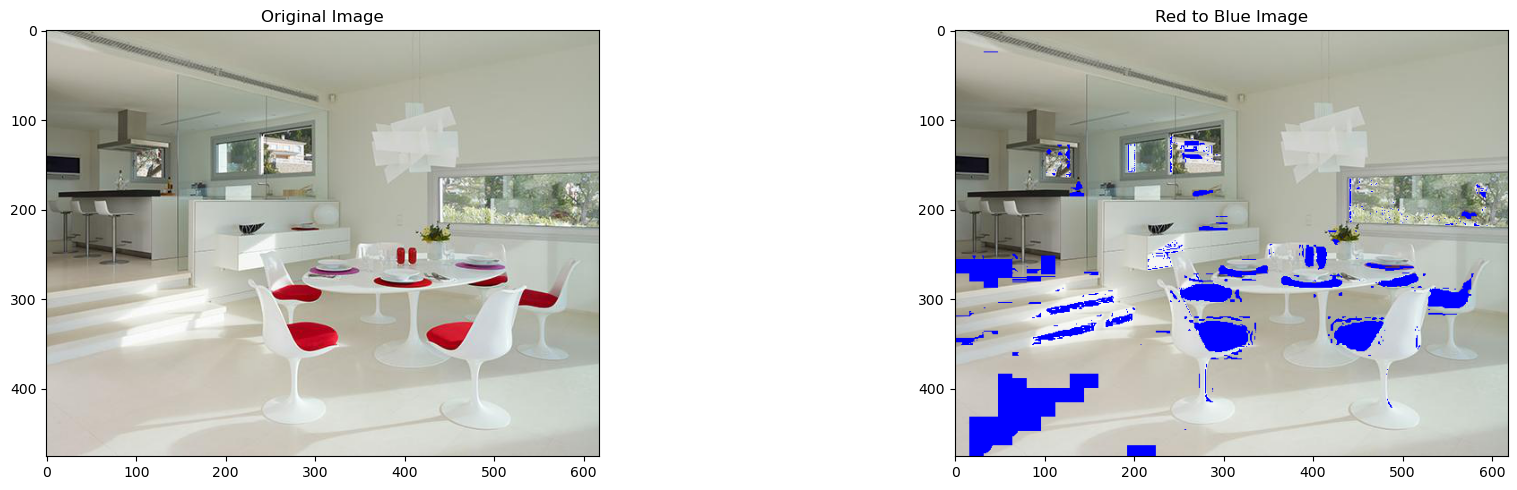

In [194]:
#identify where the red is dominant, The r array represents the red channel of the image. To replace red with blue, it is needed to 
#Identify pixels in the image where the red intensity (r) is dominant.
#Modify the corresponding pixels in the original image's RGB array, setting them to blue

# Convert the image to a NumPy array
image_array = np.array(image)
# Extract the red, green, and blue channels
r, g, b = image_array[..., 0], image_array[..., 1], image_array[..., 2]
#Put a threshold to identify the true red areas
threshold = 8
# Identify where red is dominant (red > green and red > blue)
red_mask = (r > g + threshold) & (r > b + threshold)
# Replace those red pixels with blue (R=0, G=0, B=255)
image_array[red_mask] = [0, 0, 255]
# Convert the modified array back into an image
new_image = Image.fromarray(image_array)
#plot the original image and the new image
fig, axes = plt.subplots(1, 2, figsize=(20, 5))
#Original image show
axes[0].imshow(image_rgb)
axes[0].set_title("Original Image")
#new image
axes[1].imshow(new_image)
axes[1].set_title("Red to Blue Image")

plt.tight_layout()
plt.show()

# Image Manipulation

### **Exercise: Image Operators**

*   You can find images 'model.png' and 'coat.png' in the images folder (First two images of the below visualization). Your task is to create an image from the given two images such a way that the model is wearing the coat (Third image in the visualization).
*   You can also find different textures in the images folder. Your task is to change the coat texture to any one of the given textures.
*   Visualize the images similar to the given visualization.

*Hint: Think masks!!!*

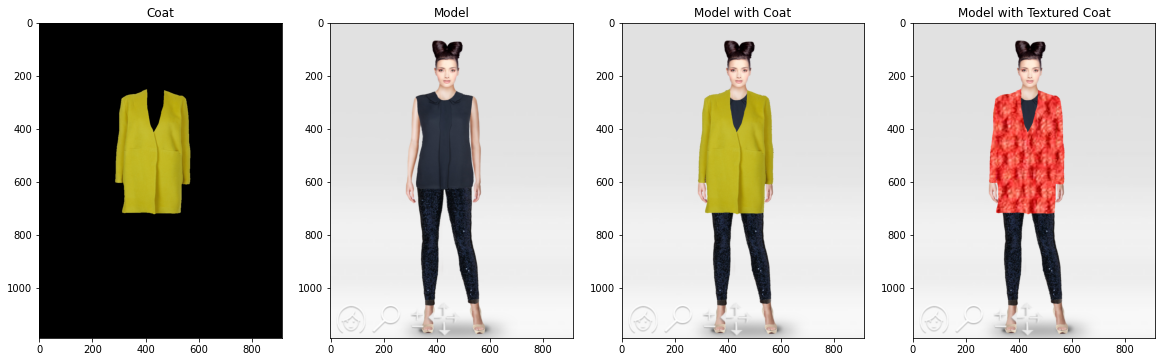

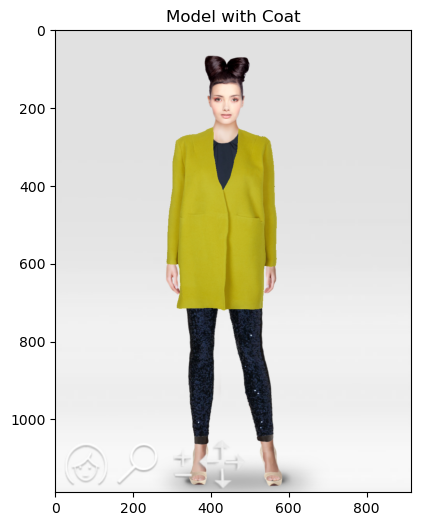

In [233]:
#create an image such that the model is wearing the coat

# Load and open the coat and model images
coat_img = Image.open("coat.png").convert("RGBA")
model_img = Image.open("model.png").convert("RGBA")

# Remove black background from the coat image
coat_data = coat_img.getdata() #the getdata() method retrieves all the pixel data from an image.

# Define a function to make the black areas transparent
transparency = []
for item in coat_data:
    # If the pixel is close to black, make it transparent
    if item[0] < 10 and item[1] < 10 and item[2] < 10:
        transparency.append((0, 0, 0, 0))  # Fully transparent
    else:
        transparency.append(item)

# Apply the transparency to the coat image
coat_img.putdata(transparency)

# Define the position for the coat overlay, 0,0 since both the coat and the model have the same positioning
position = (0, 0)

# Overlay the coat image on the model image
model_img.paste(coat_img, position, mask=coat_img)

# Convert the image to a format suitable for Matplotlib
model_with_coat_image = model_img.convert("RGB")

# Display the image using matplotlib
plt.figure(figsize=(6, 6))
plt.imshow(model_with_coat_image)
plt.title("Model with Coat")
plt.axis("on")
plt.show()

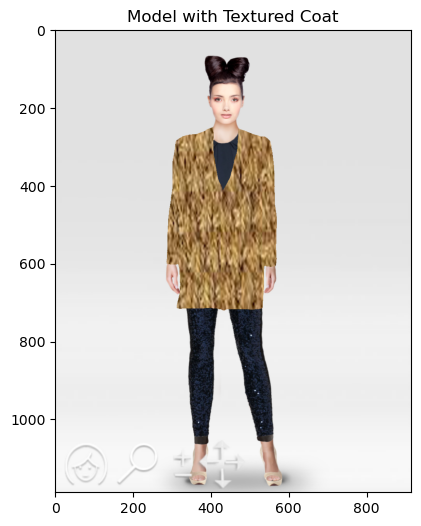

In [242]:
#create an image such that the model is wearing the coat with a different texture

# Load and open the images
coat_img = Image.open("coat.png").convert("RGBA")
model_img = Image.open("model.png").convert("RGBA")
texture_img = Image.open("texture.png").convert("RGBA")

# Remove the black background from the coat image
coat_data = coat_img.getdata()
transparency = []
for item in coat_data:
    # Make black areas transparent
    if item[0] < 10 and item[1] < 10 and item[2] < 10:
        transparency.append((0, 0, 0, 0))
    else:
        transparency.append(item)
coat_img.putdata(transparency)

# Resize the texture to match the size of the coat
texture_img = texture_img.resize(coat_img.size)

# Use the coat's alpha channel as a mask to apply the texture
coat_mask = coat_img.getchannel("A")  # Get the alpha channel (transparency)
textured_coat = Image.composite(texture_img, Image.new("RGBA", coat_img.size, (0, 0, 0, 0)), coat_mask)

# Overlay the textured coat on the model image
model_img.paste(textured_coat, (0, 0), mask=textured_coat)

# Convert the final image to RGB for matplotlib
model_with_textured_coat_image = model_img.convert("RGB")

# Display the resulting image
plt.figure(figsize=(6, 6))
plt.imshow(model_with_textured_coat_image)
plt.title("Model with Textured Coat")
plt.axis("on")  # Hide axes for better visualization
plt.show()

# Contrast Enhancement

### **Exercise: Histogram Computation**

*   Read the **'astronaut' image** from data module.
*   Convert the image to grayscale.
*   Compute the **histogram of the image.** *Hint: histogram function is available in skimage.exposure package*
*   Plot the histogram using matplotlib plot.




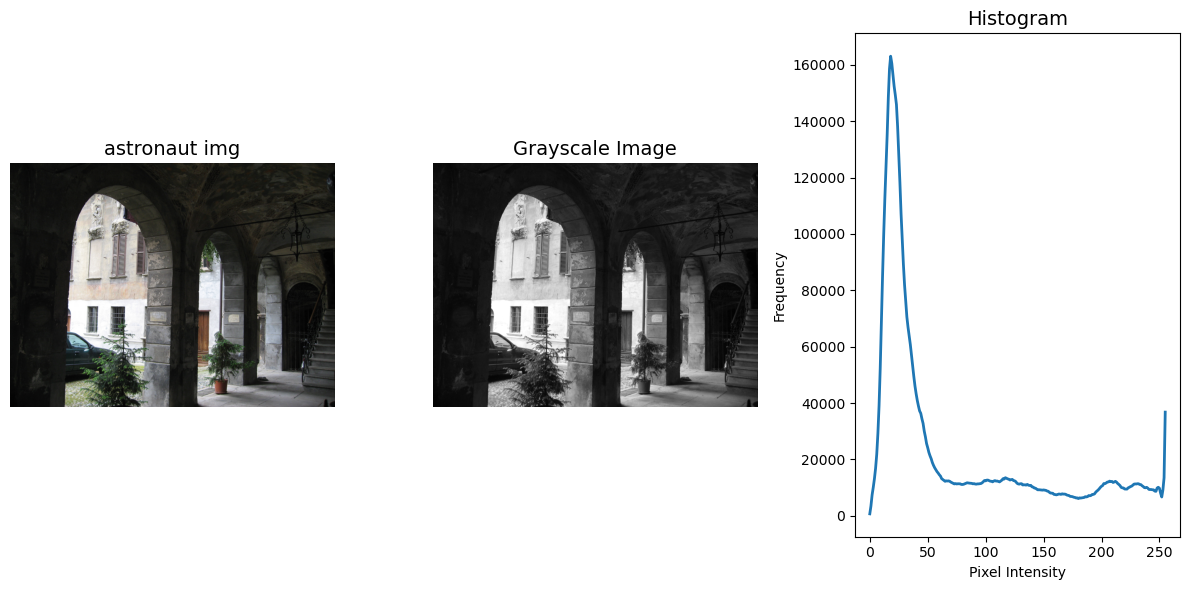

In [256]:
# Load and open the austonat image
astronaut_img = Image.open("aquatermi_lowcontrast.jpg")

#convert the image to greyscale
grayscale_img = astronaut_img.convert("L")

#convert greyscale image to a numpy array
grayscale_array = np.array(grayscale_img)

#compute the histogram
hist, bins = exposure.histogram(grayscale_array)

# Plot the grayscale image and its histogram
plt.figure(figsize=(12, 6))

# Display the image
plt.subplot(1, 3, 1)
plt.imshow(astronaut_img, cmap="gray")
plt.axis("off")
plt.title("astronaut img", fontsize=14)

# Display the grayscale image
plt.subplot(1, 3, 2)
plt.imshow(grayscale_img, cmap="gray")
plt.axis("off")
plt.title("Grayscale Image", fontsize=14)

# Plot the histogram
plt.subplot(1, 3, 3)
plt.plot(bins, hist, lw=2)
plt.title("Histogram", fontsize=14)
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

*   Change the bin count to 8 and compute the histogram of the image and plot the computed histogram using matplotlib plot.

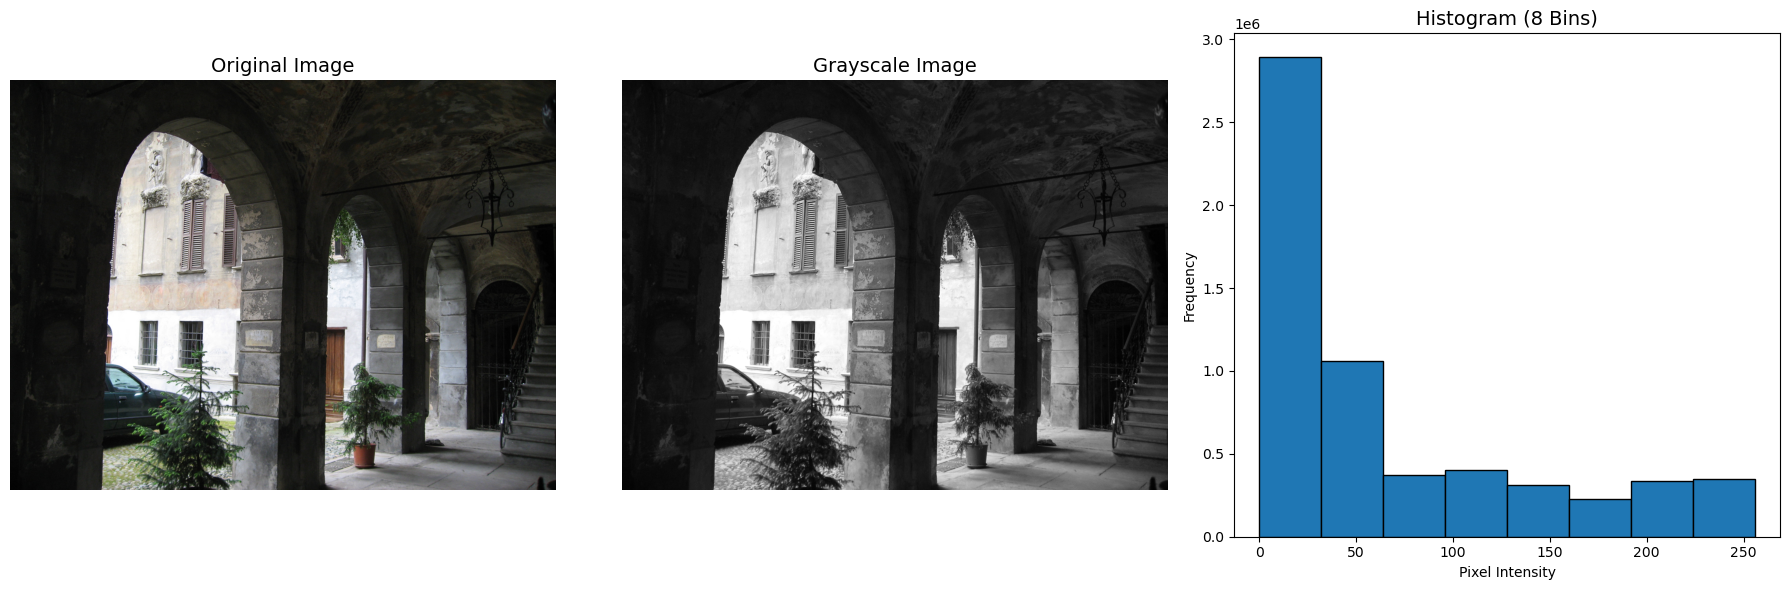

In [258]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Load the astronaut image
astronaut_img = Image.open("aquatermi_lowcontrast.jpg")

# Convert the image to grayscale
grayscale_img = astronaut_img.convert("L")

# Convert grayscale image to a NumPy array
grayscale_array = np.array(grayscale_img)

# Compute the histogram with 8 bins
hist, bins = np.histogram(grayscale_array, bins=8, range=(0, 256))

# Plot the original image, grayscale image, and its histogram
plt.figure(figsize=(18, 6))

# Display the original image
plt.subplot(1, 3, 1)
plt.imshow(astronaut_img)
plt.axis("off")
plt.title("Original Image", fontsize=14)

# Display the grayscale image
plt.subplot(1, 3, 2)
plt.imshow(grayscale_img, cmap="gray")
plt.axis("off")
plt.title("Grayscale Image", fontsize=14)

# Plot the histogram
plt.subplot(1, 3, 3)
bin_centers = (bins[:-1] + bins[1:]) / 2  # Calculate bin centers for plotting
plt.bar(bin_centers, hist, width=(bins[1] - bins[0]), align="center", edgecolor="black")
plt.title("Histogram (8 Bins)", fontsize=14)
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()




*   What happens when you change the bin count? Does your inference change based on the bin count? If yes, then how do you define the correct bin count.
*   What happens when the bin count is very low and what happens when it is very high?



In [ ]:
#The bin count determines how the range of pixel intensities is divided into intervals. 
#Changing the bin count significantly impacts the granularity and interpretation of the histogram.